In [98]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [ ]:
=State-of-Art Growth patterns=============================================

##### Uber trips in NYC declines from March to July 2019 due to new minimum wage rule (https://www.businessinsider.com/uber-lyft-rides-decline-after-new-york-minimum-wage-2019-7?IR=T). Indeed, Uber needed to make more money to pay its drivers, so it increased the trip fares, this decreased the number of travellers and consequently the number of drivers.The next massive drop is because of Covid. 

In [78]:
def smooth(y,w=9,o=1,d=2):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

In [95]:
# import data
nyc = pd.read_csv('data/Uber_NYC_2012-2022.csv')
nyc.date = nyc.apply(lambda row: pd.Timestamp(row.date), axis=1)
nyc.at[0,'date'] = pd.Timestamp('2012-07-01')

ams = pd.read_csv('data/Uber_Ams_2016-2022.csv')
ams.date = ams.apply(lambda row: pd.Timestamp(row.date), axis=1)

arjan = pd.read_csv('data/Arjan_supply.csv')
arjan.date = arjan.apply(lambda row: pd.Timestamp(row.date), axis=1)

djavadian = pd.read_csv('data/Djavadian_supply.csv')
djavadian.date = djavadian.apply(lambda row: pd.Timestamp(row.date), axis=1)

ertz = pd.read_csv('data/Ertz_supply.csv')
ertz.date = ertz.apply(lambda row: pd.Timestamp(row.date), axis=1)

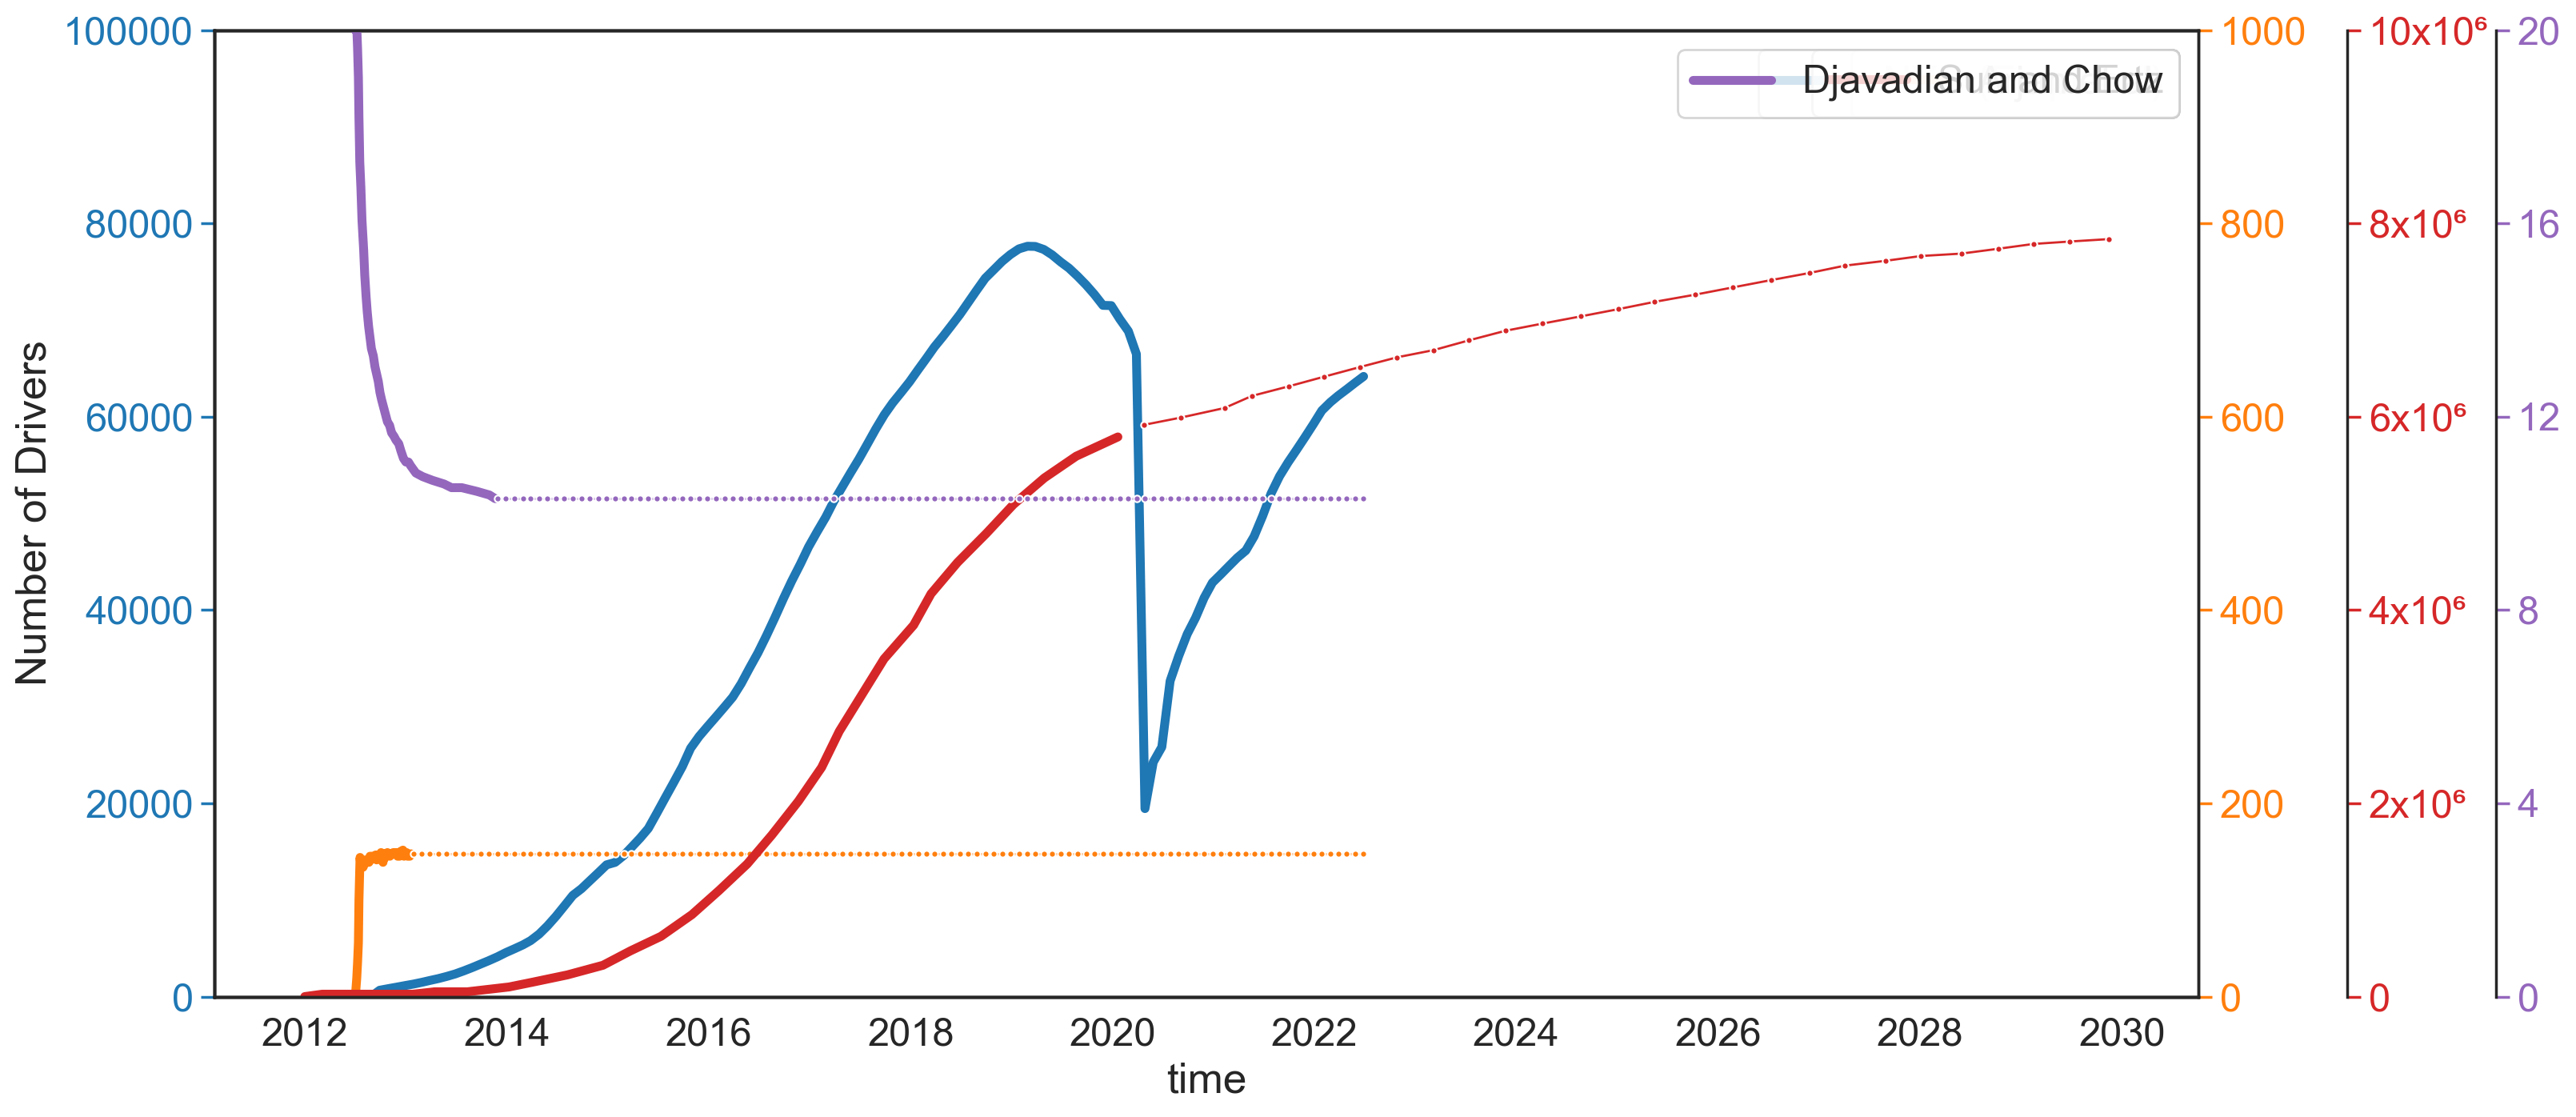

In [538]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
# sns.despine(left=True)

#---------------------NYC-------------------------------------------
nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'])
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
# nyc_y = [0 if math.isnan(y) else y/nyc_max*100*0.7 for y in nyc_y]
nyc_y = [0 if math.isnan(y) else y for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
c1 = 'C0'
sns.lineplot(x=nyc.date, y=nyc_y,lw=4, label = 'NYC (Empirical)', color=c1)
ax.set(xlabel='time', ylabel='Number of Drivers', ylim=(0,100000))
ax.tick_params(axis='y', colors=c1)

#--------------------Arjan----------------------------------------------------
ax2 = ax.twinx()
c2 = 'C1'
sns.lineplot(x=arjan.date, y=arjan.number_of_drivers,lw=4, label = 'Arjan et al.', color=c2)
sns.lineplot(x=nyc.loc[6:].date, y=147.727,lw=1, color=c2, marker = '.')
ax2.set(xlabel='time',ylabel='', ylim=(0,1000))
ax2.tick_params(axis='y', colors=c2)
# ax11.grid(b=None)

#---------------------Ertz-------------------------------------------------
ax3 = ax.twinx()
c3 = 'C3'
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].number_of_drivers,lw=4, label = 'Sun and Ertz', color=c3)
sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].number_of_drivers,lw=1, color=c3, marker = '.')
ax3.set(xlabel='time',ylabel='', ylim=(0,10))
ax3.spines.right.set_position(("axes", 1.075))
ax3.tick_params(axis='y', colors=c3)
ax3.set_yticklabels([0, '2x10\N{SUPERSCRIPT six}', '4x10\N{SUPERSCRIPT six}', '6x10\N{SUPERSCRIPT six}',
                     '8x10\N{SUPERSCRIPT six}', '10x10\N{SUPERSCRIPT six}'])

#---------------------Djavadian-------------------------------------------------
ax4 = ax.twinx()
c4 = 'C4'
sns.lineplot(x=djavadian.date, y=djavadian.number_of_drivers,lw=4, label = 'Djavadian and Chow', color=c4)
sns.lineplot(x=nyc.loc[16:].date, y=10.3030,lw=1, color=c4, marker = '.')
ax4.set(xlabel='time',ylabel='', ylim=(0,20))
ax4.spines.right.set_position(("axes", 1.15))
ax4.set_yticks([0,4,8,12,16,20])
ax4.tick_params(axis='y', colors=c4)
#--------------------------------------------------------------------------
# lines, labels = ax[1][1].get_legend_handles_labels()
# lines2, labels2 = ax11.get_legend_handles_labels()
# ax[1][1].legend(lines + lines2, labels + labels2,framealpha=1, loc=(0.73,0.6))
# ax11.legend().remove()
# ax2.spines['right'].set_color('C7')
# ax2.tick_params(axis='y', colors='C7')
# ax2.yaxis.label.set_color('C7')

# sns.despine(left=True)


In [ ]:
=======================================================================

In [96]:
nyc = nyc.loc[0:88]
ertz = ertz.loc[2:29]
ams = ams[:47]

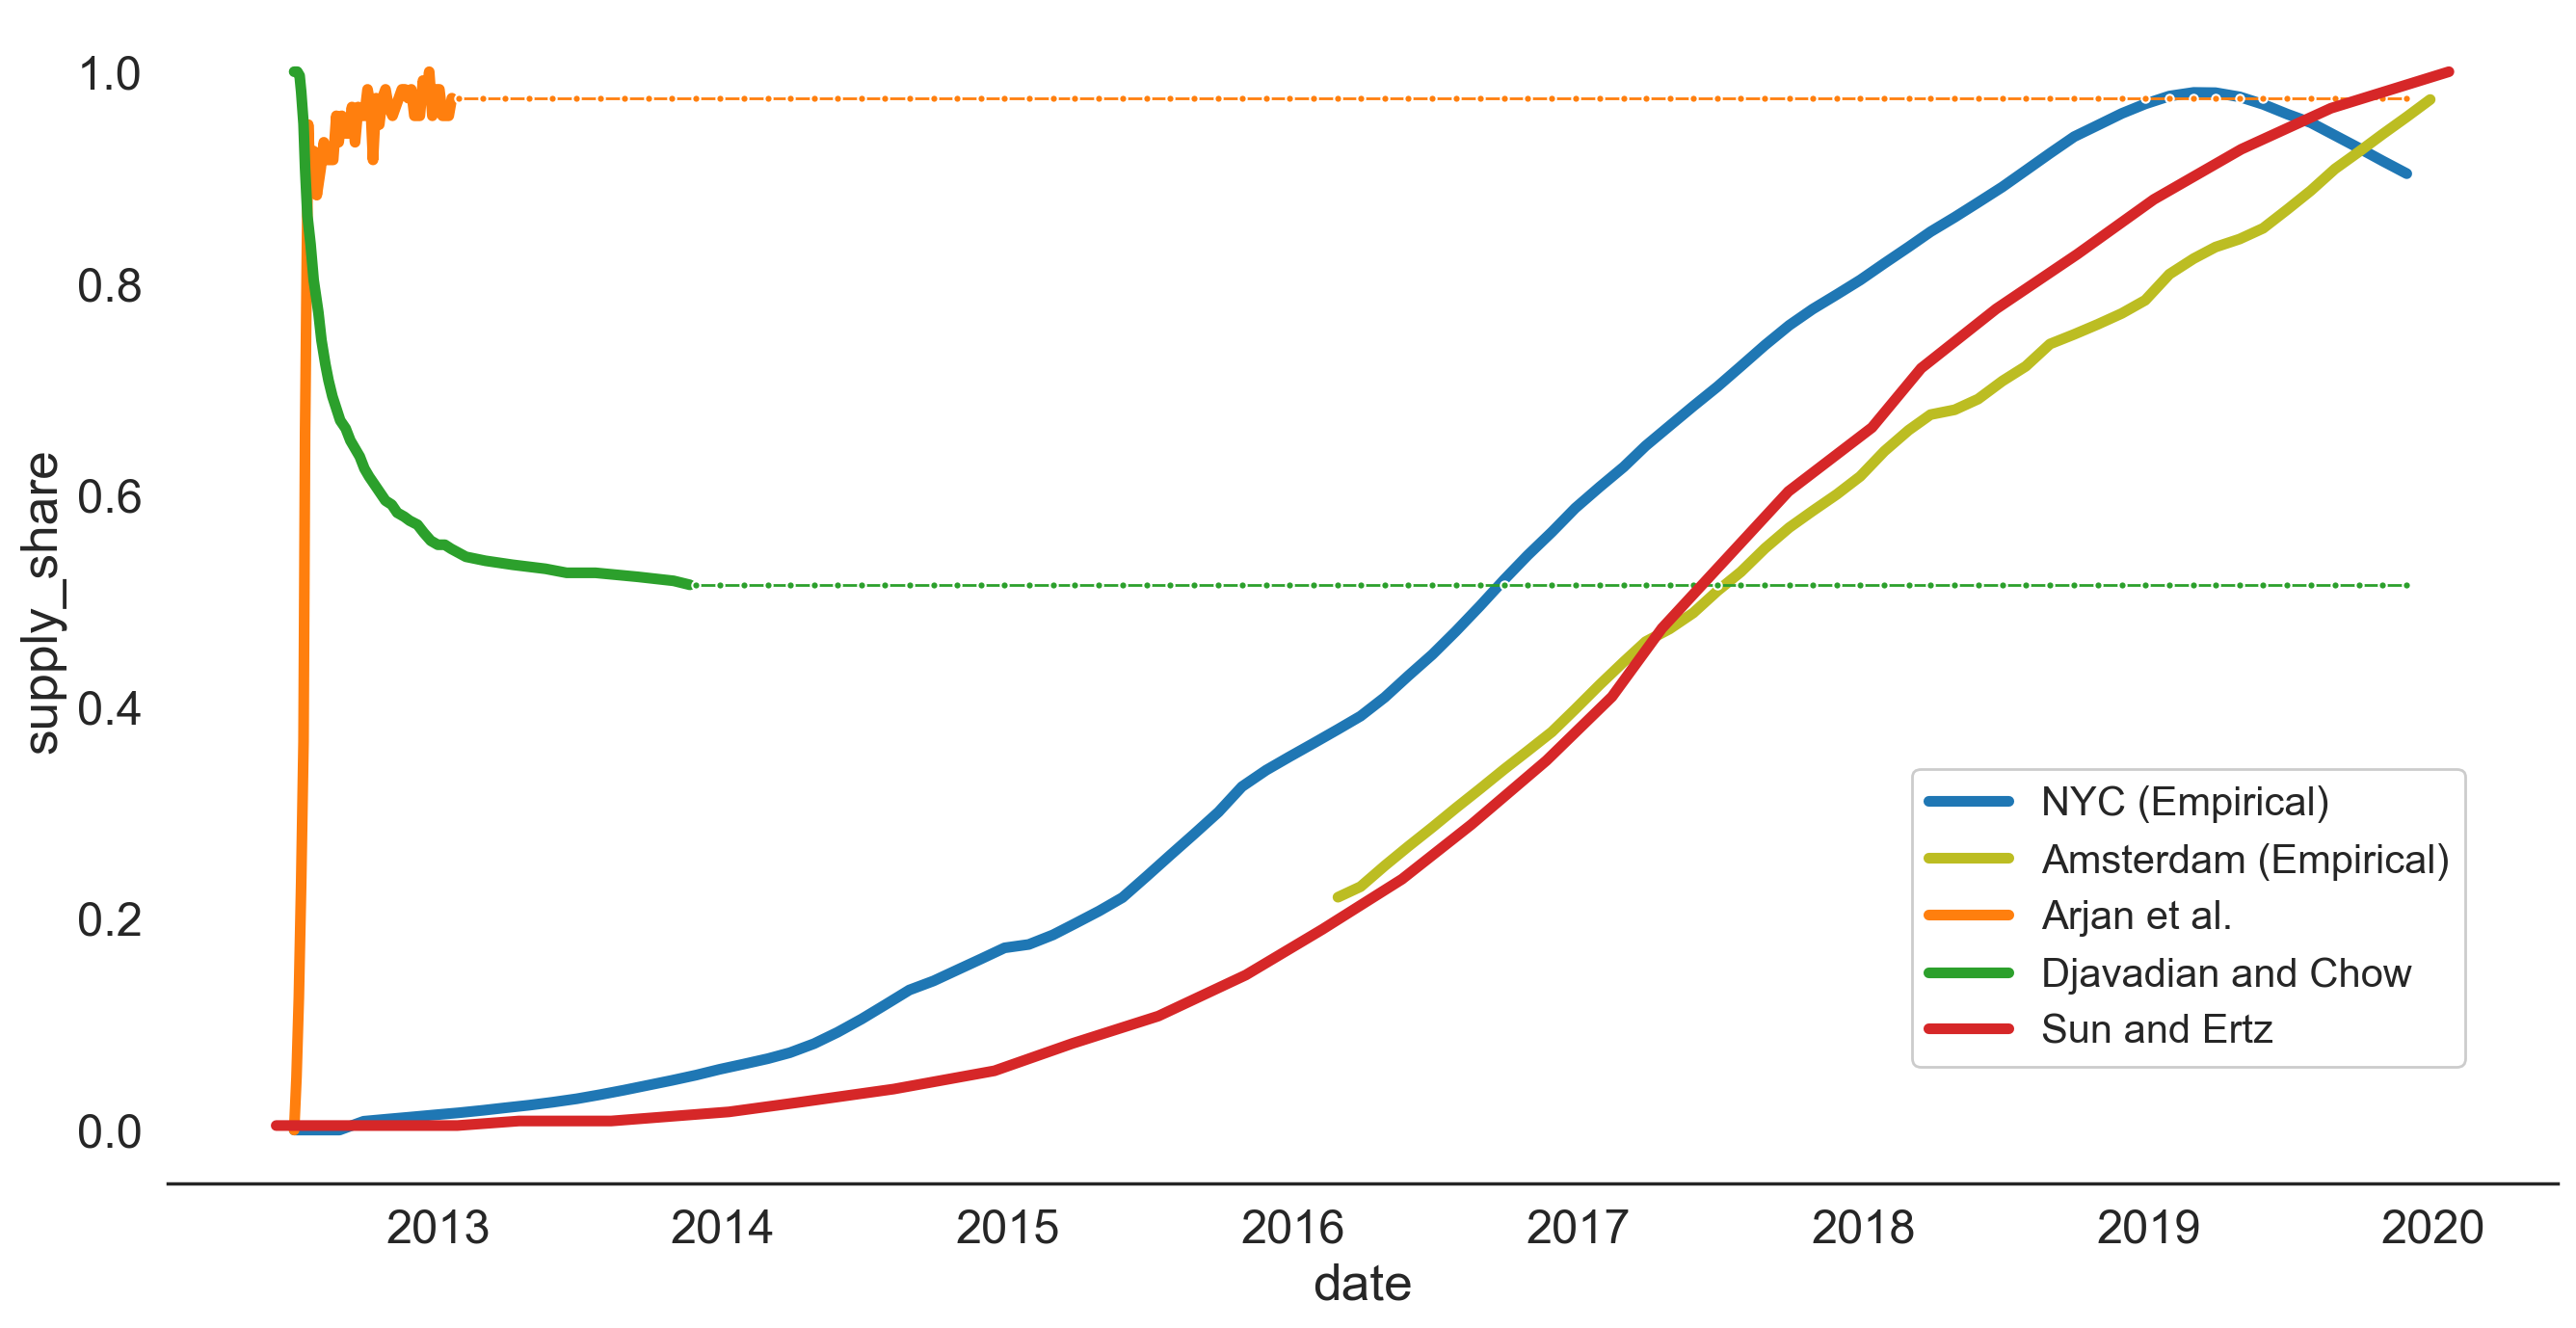

In [99]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set(palette='tab10',font_scale=1.6)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('white')
fig, ax = plt.subplots(nrows=1, figsize=(16,8))
sns.despine(left=True)

nyc_max = nyc['Unique Dispatched Vehicles'].max()
nyc_smoothed = smooth(nyc['Unique Dispatched Vehicles'])
nyc_y = nyc_smoothed[0:89]+list(nyc[89:97]['Unique Dispatched Vehicles'])+nyc_smoothed[97:]
nyc_y = [0 if math.isnan(y) else y/nyc_max for y in nyc_y]
# nyc_x = [x for x in range(1,len(nyc_y)+1)]
sns.lineplot(x=nyc.date, y=nyc_y,lw=4, label = 'NYC (Empirical)', color='C0')


ams_max = ams['Number_of_drivers'].max()
ams_y = smooth(ams['Number_of_drivers'])
ams_y = [0 if math.isnan(y) else y/ams_max for y in ams_y]
ams_y[0] = 0.22; ams_y[1] = 0.23
sns.lineplot(x=ams.date, y=ams_y,lw=4, label = 'Amsterdam (Empirical)', color='C8')


arjan_max = arjan.supply_share.max()
arjan_last_v = arjan.supply_share[len(arjan)-1]
sns.lineplot(x=arjan.date, y=arjan.supply_share/arjan_max, lw=4, label = 'Arjan et al.', color='C1')
sns.lineplot(x=nyc.loc[6:].date, y=arjan_last_v/arjan_max,lw=1, color='C1', marker = '.')


djavadian_max = djavadian.supply_share.max()
djavadian_last_v = djavadian.supply_share[len(djavadian)-1]
sns.lineplot(x=djavadian.date, y=djavadian.supply_share/djavadian_max,lw=4, label = 'Djavadian and Chow', color='C2')
sns.lineplot(x=nyc.loc[16:].date, y=djavadian_last_v/djavadian_max,lw=1, color='C2', marker = '.')

ertz_max = ertz.supply_share.max()
ertz_last_v = ertz.supply_share[len(ertz)-1]
sns.lineplot(x=ertz.loc[0:29].date, y=ertz.loc[0:29].supply_share/ertz_max,lw=4, label = 'Sun and Ertz', color='C3')
# sns.lineplot(x=ertz.loc[30:].date, y=ertz.loc[30:].supply_share/ertz_max,lw=1, color='C3', marker = '.')


# ax.set(xlabel='time', ylabel='Supply Share [%]', ylim=(-5,100))
ax.legend(frameon=True,framealpha=1, loc=(0.73,0.1),fontsize=15)#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
